# Introduction

This notebook explores feature engineering and selection to predict H&M article prices. Techniques like one-hot encoding and PCA are used to improve model accuracy. Models evaluated include KNN, Random Forest, Gradient Boosting, Bagging, and Linear Regression. The goal is to identify the most accurate model for enhancing H&M's pricing strategy.

# Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from functions import *

### Set Display Options for Pandas

In [2]:
# Set display options for pandas
pd.set_option('display.max_columns', None)

### Load the dataset

In [3]:
df = pd.read_csv('../Data/df.csv')
heatmap_df = preprocess_and_create_heatmap_df(df)

# Define features and target variable

In [4]:
# Define features and target variable
features = heatmap_df.drop('price', axis=1)
target = heatmap_df['price']

# Split the data into training and testing sets

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# Ensure all column names are strings

In [6]:
# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize the MinMaxScaler and fit it to the training data

In [7]:
# Initialize the MinMaxScaler and fit it to the training data
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

# Transform the training and testing data

In [8]:
# Transform the training and testing data
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Transform columns to numeric for KNN

In [9]:
# Transform columns to numeric for KNN
for i in X_train.columns:
    X_train[i] = X_train[i].astype(int)
for i in X_test.columns:
    X_test[i] = X_test[i].astype(int)

# Transform the training and testing data again

In [10]:
# Transform the training and testing data again
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Testing the models

## Initialize the models

In [11]:
# Initialize the models
models = {
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Bagging': BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42),
    'Linear Regression': LinearRegression()
}

## Train and evaluate the models

In [12]:
# Train and evaluate the models
results = []

for model_name, model in models.items():
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)
    
    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_standardized = r2_score(y_test, y_pred)
    
    # Store the results
    results.append({
        'Model': model_name,
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'R-squared': r2_standardized
    })

/home/danicoco/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Convert and print the results to DataFrame

In [13]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

               Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0                KNN                   0.013167                  0.000539   
1      Random Forest                   0.012079                  0.000475   
2  Gradient Boosting                   0.012429                  0.000490   
3            Bagging                   0.012095                  0.000475   
4  Linear Regression                   0.012232                  0.000482   

   R-squared  
0   0.197233  
1   0.292370  
2   0.269941  
3   0.291828  
4   0.282263  


# Find the best performing model based on R-squared

In [14]:
# Find the best performing model based on R-squared
best_model = results_df.loc[results_df['R-squared'].idxmax()]
print("\nBest performing model:")
print(best_model)


Best performing model:
Model                        Random Forest
Mean Absolute Error (MAE)         0.012079
Mean Squared Error (MSE)          0.000475
R-squared                          0.29237
Name: 1, dtype: object


# Visual comparison

               Model       MAE       MSE  R2 Score
0                KNN  0.013167  0.000539  0.197233
1      Random Forest  0.012079  0.000475  0.292370
2  Gradient Boosting  0.012429  0.000490  0.269941
3            Bagging  0.012095  0.000475  0.291828
4  Linear Regression  0.012232  0.000482  0.282263


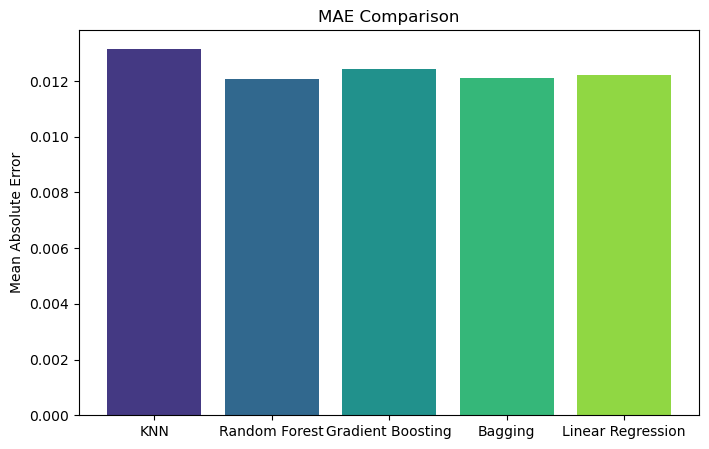

<Figure size 640x480 with 0 Axes>

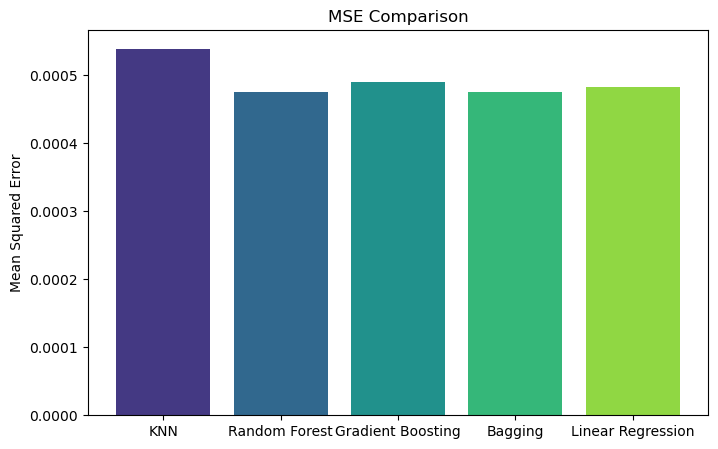

<Figure size 640x480 with 0 Axes>

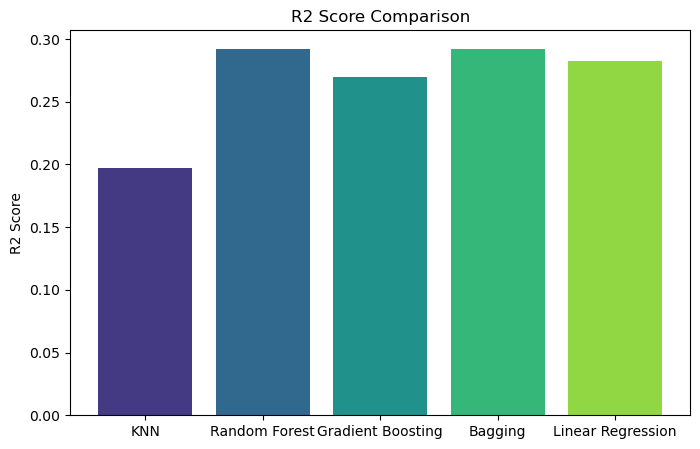

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a summary dataframe for the results
results = {
    'Model': ['KNN', 'Random Forest', 'Gradient Boosting', 'Bagging', 'Linear Regression,'],
    'MAE': [0.013167, 0.012079, 0.012429, 0.012095, 0.012232],
    'MSE': [0.000539, 0.000475, 0.000490, 0.000475, 0.000482],
    'R2 Score': [0.197233, 0.292370, 0.269941, 0.291828, 0.282263]
}

results_df = pd.DataFrame(results)

# Display the summary table
print(results_df)

# Define colors using the viridis palette
colors = sns.color_palette("viridis", len(results_df))

# Plot MAE
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['MAE'], color=colors)
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')
plt.show()
#save the chart as a png file
plt.savefig('../Data/Charts/MAE.png')

# Plot MSE
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['MSE'], color=colors)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.show()
#save the chart as a png file
plt.savefig('../Data/Charts/MSE.png')

# Plot R2 Score
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['R2 Score'], color=colors)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()
#save the chart as a png file
plt.savefig('../Data/Charts/R2_Score.png')



# Analysis

## Mean Absolute Error (MAE) Analysis:
The Random Forest model has the lowest MAE (0.012079), closely followed by the Bagging model (0.012095). This indicates that these models have the smallest average errors in their predictions.
The Gradient Boosting model also performs well with an MAE of 0.012429.
The KNN model has a slightly higher MAE (0.013167), but it is still reasonably close to the top models.
The Linear Regression model performs comparably to the ensemble models with an MAE of 0.012232.
## Mean Squared Error (MSE) Analysis:
The Random Forest and Bagging models both have the lowest MSE (0.000475), suggesting they have the smallest average squared errors.
The Gradient Boosting model follows closely with an MSE of 0.000490.
The KNN model has a slightly higher MSE (0.000539), but it is still close to the top-performing models.
The Linear Regression model has an MSE of 0.000482, performing better than KNN and close to the top models.
## R2 Score Analysis:
The Random Forest model has the highest R2 score (0.292370), meaning it explains the highest proportion of the variance in the target variable.
The Bagging model follows closely with an R2 score of 0.291828.
The Gradient Boosting model has an R2 score of 0.269941.
The Linear Regression model performs well with an R2 score of 0.282263.
The KNN model has a lower R2 score (0.197233), indicating it explains less variance compared to the other top models.
## Conclusion:
The Random Forest model is the best-performing model overall, with the lowest MAE and MSE and the highest R2 score.
Bagging and Gradient Boosting models also perform well, showing competitive MAE, MSE, and R2 scores.
The Linear Regression model performs comparably to the ensemble models, making it a viable option for prediction.
The KNN model performs reasonably well but is slightly less accurate compared to the ensemble models.
This analysis suggests focusing on ensemble methods like Random Forest and Bagging for better prediction accuracy in this dataset. Linear Regression also proves to be a strong contender.





